In [1]:
import pandas as pd

In [2]:
url_dados_internacoes = 'https://raw.githubusercontent.com/peixotosandro/Bootcamp-Data-Science-Projeto-Modulo1/main/Dados/Interna%C3%A7%C3%B5es%20por%20Ano%20m%C3%AAs%20atendimento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o%20Jan2008-Mar2021.csv'


In [3]:
dados = pd.read_csv(url_dados_internacoes,encoding="ISO-8859-1", skiprows=3, sep=";",skipfooter=12, thousands=".", decimal=",")
dados = dados.set_index("Unidade da Federação")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


**Foram filtrados os dados referente as internações entre nov/2015 - nov/2020, seguindo os critérios:**

*   Foram retirados os últimos seis meses, pois estão sujeitos a atualização.
*   Foram considerados a partir de novembro de 2015, pois estão disponíveis como "Natureza Jurídica" e "Esfera Jurídica".
 

In [4]:
pd.options.display.float_format = "{:,.2f}".format

dados_sem_total = dados.drop("Total",axis=1)
colunas_nov2015_nov2020 = dados_sem_total.columns[106:167]
dados_sem_total = dados_sem_total[colunas_nov2015_nov2020]
dados_sem_total

,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,8938,8882,8780,8810,9742,9819,10085,9687,9171,9362,9205,9338,8556,8351,8496,8227,10310,9520,10111,9406,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865
12 Acre,3746,3866,3968,3952,4044,3843,3920,3993,4088,4082,3776,3764,3398,3735,3773,3471,3804,3367,3762,3857,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834
13 Amazonas,13598,13317,14122,13382,15170,14597,14716,14403,13866,14005,13060,13337,12312,12468,13586,13063,14837,14572,15575,15137,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424
14 Roraima,2783,2636,2897,2839,3107,2766,2929,3238,3282,3604,3104,3269,3226,3063,3276,3267,3755,3572,3988,3773,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248
15 Pará,37784,36775,37912,37491,41969,40891,40156,38650,38226,41194,39850,37542,36531,33986,39046,35878,42632,38556,42574,39699,39191,41852,40184,41739,40430,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120
16 Amapá,2825,2550,2595,2403,2819,2686,2777,2965,2702,2791,2670,2601,2593,2490,2805,2449,3163,2903,3096,2941,2844,3091,2938,2834,2663,2484,2744,2540,2797,3101,3139,3041,3132,3508,3510,3576,3303,3301,3454,3386,3533,3542,3272,3329,3356,3147,3494,3476,3298,3013,3313,3143,2956,2295,2526,2617,2746,2993,2822,3112,2890
17 Tocantins,6139,5461,5655,6267,6954,6999,6951,6483,6428,6288,6029,5973,6141,6029,6371,6182,7706,6637,6999,6820,6264,6640,6323,6243,5472,5991,5881,5176,6003,6235,6520,5582,5184,5636,5548,6041,6123,6173,5947,5842,6645,7160,7178,6876,6587,7165,7159,7229,7420,7480,7130,7149,6668,5899,5754,5999,6039,4805,3848,2251,475
21 Maranhão,33143,31896,34748,34900,36984,35940,36457,34783,33183,35806,33652,31865,29897,26779,33978,32675,37923,35061,38425,36442,37396,36970,35629,37596,36921,35895,40245,34823,39330,41060,41571,38360,39493,40807,39192,40657,37595,35546,38425,35256,39536,40015,41332,37554,38756,38320,37972,39072,37990,36533,38344,35815,34905,25382,28312,29653,32088,32841,33038,34964,33217
22 Piauí,17204,16392,17888,17667,18845,18322,19068,18409,18178,18793,18089,17825,16978,16053,17649,16575,19275,17843,19171,17570,17055,17627,17131,17531,17552,17088,17954,15618,18214,18800,19455,17849,17887,18084,17725,18184,17392,17274,18007,16684,18223,17892,19081,17919,18250,18971,18943,20170,18364,17722,18528,17503,16099,11770,13180,13657,14643,15099,15925,16473,15871


In [5]:
ufs = dados_sem_total.index
regioes = {"1" : "Norte",
           "2" : "Nordeste",
           "3" : "Sudeste",
           "4" : "Sul",
           "5" : "Centro-oeste"}
dados_sem_total['Região'] = list(map(lambda uf: regioes[uf[0]], ufs))
dados_sem_total

,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,8938,8882,8780,8810,9742,9819,10085,9687,9171,9362,9205,9338,8556,8351,8496,8227,10310,9520,10111,9406,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,Norte
12 Acre,3746,3866,3968,3952,4044,3843,3920,3993,4088,4082,3776,3764,3398,3735,3773,3471,3804,3367,3762,3857,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,Norte
13 Amazonas,13598,13317,14122,13382,15170,14597,14716,14403,13866,14005,13060,13337,12312,12468,13586,13063,14837,14572,15575,15137,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,Norte
14 Roraima,2783,2636,2897,2839,3107,2766,2929,3238,3282,3604,3104,3269,3226,3063,3276,3267,3755,3572,3988,3773,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,Norte
15 Pará,37784,36775,37912,37491,41969,40891,40156,38650,38226,41194,39850,37542,36531,33986,39046,35878,42632,38556,42574,39699,39191,41852,40184,41739,40430,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,Norte
16 Amapá,2825,2550,2595,2403,2819,2686,2777,2965,2702,2791,2670,2601,2593,2490,2805,2449,3163,2903,3096,2941,2844,3091,2938,2834,2663,2484,2744,2540,2797,3101,3139,3041,3132,3508,3510,3576,3303,3301,3454,3386,3533,3542,3272,3329,3356,3147,3494,3476,3298,3013,3313,3143,2956,2295,2526,2617,2746,2993,2822,3112,2890,Norte
17 Tocantins,6139,5461,5655,6267,6954,6999,6951,6483,6428,6288,6029,5973,6141,6029,6371,6182,7706,6637,6999,6820,6264,6640,6323,6243,5472,5991,5881,5176,6003,6235,6520,5582,5184,5636,5548,6041,6123,6173,5947,5842,6645,7160,7178,6876,6587,7165,7159,7229,7420,7480,7130,7149,6668,5899,5754,5999,6039,4805,3848,2251,475,Norte
21 Maranhão,33143,31896,34748,34900,36984,35940,36457,34783,33183,35806,33652,31865,29897,26779,33978,32675,37923,35061,38425,36442,37396,36970,35629,37596,36921,35895,40245,34823,39330,41060,41571,38360,39493,40807,39192,40657,37595,35546,38425,35256,39536,40015,41332,37554,38756,38320,37972,39072,37990,36533,38344,35815,34905,25382,28312,29653,32088,32841,33038,34964,33217,Nordeste
22 Piauí,17204,16392,17888,17667,18845,18322,19068,18409,18178,18793,18089,17825,16978,16053,17649,16575,19275,17843,19171,17570,17055,17627,17131,17531,17552,17088,17954,15618,18214,18800,19455,17849,17887,18084,17725,18184,17392,17274,18007,16684,18223,17892,19081,17919,18250,18971,18943,20170,18364,17722,18528,17503,16099,11770,13180,13657,14643,15099,15925,16473,15871,Nordeste


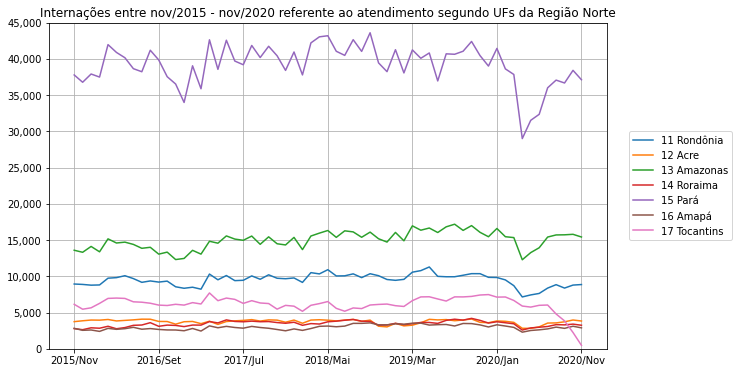

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ufs_norte = dados_sem_total.loc[dados_sem_total['Região'] == 'Norte']
ufs_norte = ufs_norte.drop('Região', axis=1)

ax = ufs_norte.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Internações entre nov/2015 - nov/2020 referente ao atendimento segundo UFs da Região Norte")
plt.grid()
plt.ylim(0,45000)
plt.show()

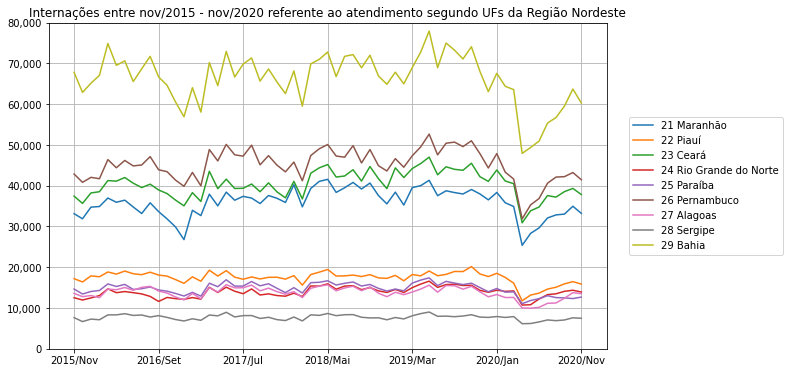

In [7]:
ufs_nordeste = dados_sem_total.loc[dados_sem_total['Região'] == 'Nordeste']
ufs_nordeste = ufs_nordeste.drop('Região', axis=1)

ax = ufs_nordeste.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Internações entre nov/2015 - nov/2020 referente ao atendimento segundo UFs da Região Nordeste")
plt.ylim(0,80000)
plt.grid()
plt.show()

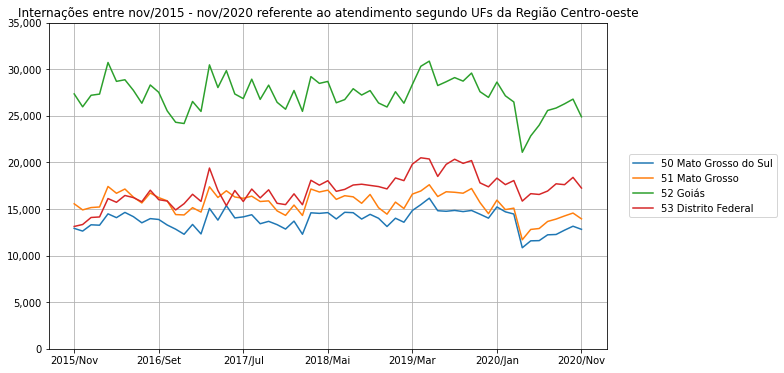

In [8]:
ufs_centro_oeste = dados_sem_total.loc[dados_sem_total['Região'] == 'Centro-oeste']
ufs_centro_oeste = ufs_centro_oeste.drop('Região', axis=1)

ax = ufs_centro_oeste.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Internações entre nov/2015 - nov/2020 referente ao atendimento segundo UFs da Região Centro-oeste")
plt.grid()
plt.ylim(0,35000)
plt.show()

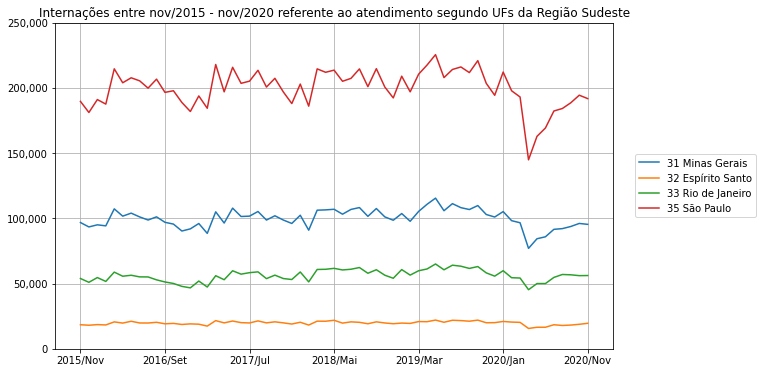

In [9]:
ufs_sudeste = dados_sem_total.loc[dados_sem_total['Região'] == 'Sudeste']
ufs_sudeste = ufs_sudeste.drop('Região', axis=1)

ax = ufs_sudeste.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Internações entre nov/2015 - nov/2020 referente ao atendimento segundo UFs da Região Sudeste")
plt.grid()
plt.ylim(0,250000)
plt.show()

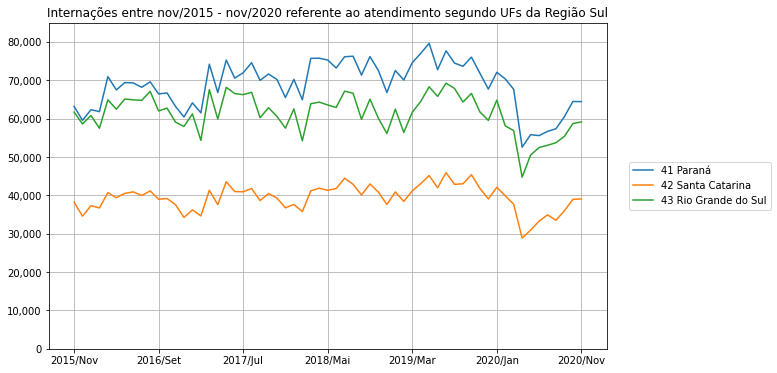

In [10]:
ufs_sul = dados_sem_total.loc[dados_sem_total['Região'] == 'Sul']
ufs_sul = ufs_sul.drop('Região', axis=1)

ax = ufs_sul.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Internações entre nov/2015 - nov/2020 referente ao atendimento segundo UFs da Região Sul")
plt.grid()
plt.ylim(0,85000)
plt.show()

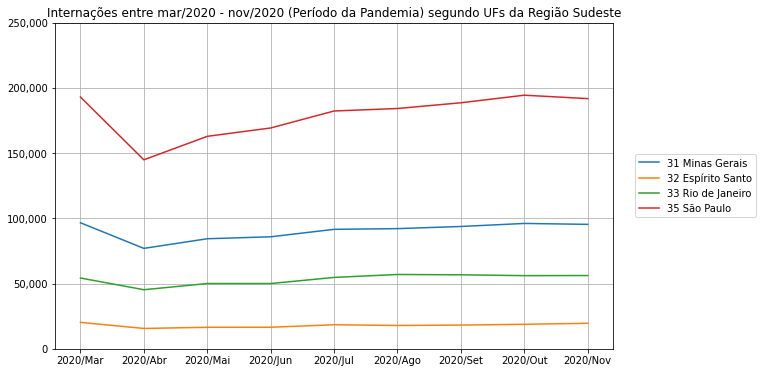

In [16]:
ufs_sudeste = dados_sem_total.loc[dados_sem_total['Região'] == 'Sudeste']
ufs_sudeste = ufs_sudeste.drop('Região', axis=1)

colunas_mar2020_nov2020 = ufs_sudeste.columns[-9:]
ufs_sudeste = ufs_sudeste[colunas_mar2020_nov2020]

ax = ufs_sudeste.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Internações entre mar/2020 - nov/2020 (Período da Pandemia) segundo UFs da Região Sudeste")
plt.grid()
plt.ylim(0,250000)
plt.show()

In [12]:
url_dados_populacao_2020 = 'https://raw.githubusercontent.com/peixotosandro/Bootcamp-Data-Science-Projeto-Modulo1/main/Dados/Popula%C3%A7%C3%A3o%20residente%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o%202020.csv'


In [13]:
dados_populacao_2020 = pd.read_csv(url_dados_populacao_2020,encoding="ISO-8859-1", skiprows=3,sep=";",skipfooter=12, thousands=".", decimal=",")
dados_populacao_2020 = dados_populacao_2020.set_index("Unidade da Federação")

ufs_sudeste_pop = ufs_sudeste.copy()

ufs_sudeste_pop['Média'] = list(map(lambda uf: ufs_sudeste.loc[uf].mean(), ufs_sudeste_pop.index))
ufs_sudeste_pop['População'] = list(map(lambda uf: dados_populacao_2020.loc[uf][0], ufs_sudeste_pop.index))
ufs_sudeste_pop['% da População Internada'] = list(map(lambda uf: (ufs_sudeste_pop.loc[uf]['Média'] / ufs_sudeste_pop.loc[uf]['População']) * 100 , ufs_sudeste_pop.index))
ufs_sudeste_pop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,Média,População,% da População Internada
Unidade da Federação,,,,,,,,,,,,
31 Minas Gerais,96611,76976,84354,85860,91569,92113,93755,96086,95388,"90,301.33",21292666,0.42
32 Espírito Santo,20262,15597,16501,16517,18437,17879,18184,18778,19550,"17,967.22",4064052,0.44
33 Rio de Janeiro,54250,45289,50006,50021,54714,56961,56717,56069,56160,"53,354.11",17366189,0.31
35 São Paulo,193003,144854,162854,169257,182276,184181,188578,194383,191774,"179,017.78",46289333,0.39


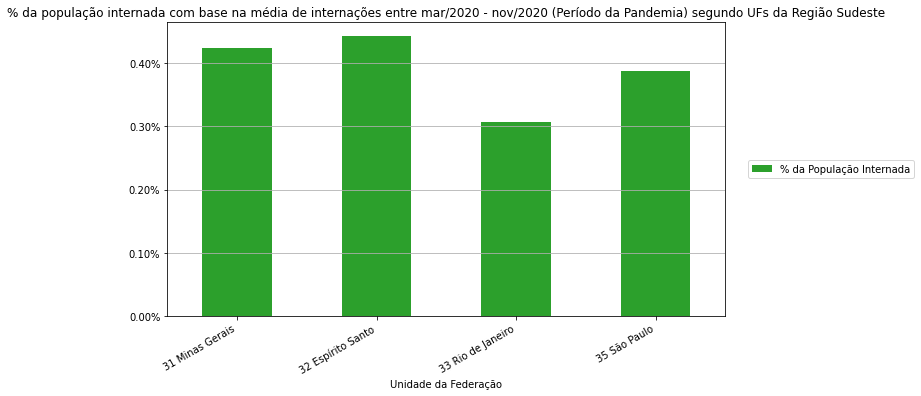

In [21]:
ax = ufs_sudeste_pop['% da População Internada'].T.plot(kind="bar", color="tab:green", figsize=(10,6))
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}%"))

plt.gcf().autofmt_xdate()
plt.gca().yaxis.grid(True)
plt.title("% da população internada com base na média de internações entre mar/2020 - nov/2020 (Período da Pandemia) segundo UFs da Região Sudeste")
plt.show()